Rickord, Jake JJ \
Final Project \
COVID19 - Prediction Modeling

In [4]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
#import the dataframe
df=pd.read_csv(r'C:\Users\Jake\Desktop\Bellevue Items\Assignments\Predictive Analytics\Project\COVID19_state.csv')
df

,State,Tested,Infected,Deaths,Population,Num Vaccinated,Pop Density,Gini,ICU Beds,Income,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,407843,1.2863,0.4081,119,59687,...,21,11064,6.4,1,26.60,66.0,0.36,0.39,0.25,3/19/2020
1,Alabama,1356420,194892,2973,4908621,2514065,96.9221,0.4847,1533,42334,...,101,7281,8.1,1,62.80,59.0,0.33,0.37,0.31,3/16/2020
2,Arkansas,1363429,113641,1985,3038999,1645766,58.4030,0.4719,732,42566,...,88,7408,7.1,0,60.40,56.2,0.34,0.37,0.30,3/17/2020
3,Arizona,1792602,248139,5982,7378494,4219928,64.9550,0.4713,1559,43650,...,83,6452,9.7,1,60.30,89.8,0.33,0.36,0.30,3/16/2020
4,California,18912501,930628,17672,39937489,27697192,256.3727,0.4899,7338,62586,...,359,7549,12.8,9,59.40,95.0,0.33,0.40,0.26,3/19/2020
5,Colorado,2034795,109910,2105,5845526,3706962,56.4011,0.4586,1597,56846,...,89,6804,6.7,1,45.10,86.2,0.33,0.40,0.27,3/23/2020
6,Connecticut,2367994,73858,4627,3563077,2662017,735.8689,0.4945,674,74561,...,32,9859,7.2,1,49.00,88.0,0.30,0.38,0.32,3/17/2020
7,District of Columbia,528174,17438,647,720687,485544,11814.5410,0.5420,314,47285,...,10,11944,9.8,0,54.65,100.0,0.30,0.48,0.22,3/16/2020
8,Delaware,565983,25311,710,982895,631866,504.3073,0.4522,186,51449,...,7,10254,8.3,0,55.30,83.3,0.30,0.37,0.33,3/16/2020
9,Florida,10126764,801371,17043,21992985,14039209,410.1256,0.4852,5604,49417,...,217,8076,7.4,7,70.70,91.2,0.29,0.37,0.35,3/16/2020


First off, let's define our dependent variable so we can identify which variable we're looking to predict. Pulling from our proposal, we're looking to predict the infection rate of a population. With this in mind, it may be beneficial to create a column that represents infected as a percentage of overall population. Let's make that now.

In [6]:
df['Percent Infected']=(df['Infected']/df['Population'])*100
df['Percent Infected']

0     2.323836
1     3.970402
2     3.739422
3     3.363003
4     2.330212
5     1.880241
6     2.072871
7     2.419636
8     2.575148
9     3.643757
10    3.380393
11    1.087785
12    3.879807
13    3.564208
14    3.394722
15    2.745371
16    3.065844
17    2.437278
18    4.047095
19    2.301251
20    2.416442
21    0.505205
22    2.034101
23    2.694770
24    3.050377
25    4.043308
26    3.151757
27    2.619974
28    6.040910
29    3.670342
30    0.825527
31    2.696749
32    2.252747
33    3.252392
34    2.630430
35    1.888958
36    3.165630
37    1.068985
38    1.653522
39    3.230568
40    3.434045
41    5.298845
42    3.835942
43    3.085125
44    3.586285
45    2.126288
46    0.353310
47    1.389171
48    4.185548
49    1.419235
50    2.498479
Name: Percent Infected, dtype: float64

Excellent. Now, let's take a quick look at our columns, and identify any ones that stand out to us as being able to be eliminated.

In [7]:
df.columns

Index(['State', 'Tested', 'Infected', 'Deaths', 'Population', 'Num Vaccinated',
       'Pop Density', 'Gini', 'ICU Beds', 'Income', 'GDP', 'Unemployment',
       'Sex Ratio', 'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths',
       'Physicians', 'Hospitals', 'Health Spending', 'Pollution',
       'Med-Large Airports', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54',
       'Age 55+', 'School Closure Date', 'Percent Infected'],
      dtype='object')

Examining these independent variables, the only one that jumps out at us is number of deaths. As we are not predicting loss of life, and as deaths are a progression from Infected, we can eliminate that varible.

In [8]:
del df['Deaths']

Let's check next for any columns that have missing values.

In [9]:
print(df.isnull().sum())

State                  0
Tested                 0
Infected               0
Population             0
Num Vaccinated         0
Pop Density            0
Gini                   0
ICU Beds               0
Income                 0
GDP                    0
Unemployment           0
Sex Ratio              0
Smoking Rate           0
Flu Deaths             0
Respiratory Deaths     0
Physicians             0
Hospitals              0
Health Spending        0
Pollution              0
Med-Large Airports     0
Temperature            0
Urban                  0
Age 0-25               0
Age 26-54              0
Age 55+                0
School Closure Date    3
Percent Infected       0
dtype: int64


Looks like we have 3 rows in School Closure Data column that have NAs. Let's examine this column further.

In [10]:
df['School Closure Date']

0     3/19/2020
1     3/16/2020
2     3/17/2020
3     3/16/2020
4     3/19/2020
5     3/23/2020
6     3/17/2020
7     3/16/2020
8     3/16/2020
9     3/16/2020
10    3/18/2020
11    3/23/2020
12          NaN
13    3/23/2020
14    3/17/2020
15    3/19/2020
16    3/18/2020
17    3/16/2020
18    3/16/2020
19    3/17/2020
20    3/16/2020
21          NaN
22    3/16/2020
23    3/18/2020
24    3/19/2020
25    3/20/2020
26    3/16/2020
27    3/16/2020
28    3/16/2020
29          NaN
30    3/16/2020
31    3/18/2020
32    3/16/2020
33    3/16/2020
34    3/18/2020
35    3/17/2020
36    3/17/2020
37    3/16/2020
38    3/16/2020
39    3/16/2020
40    3/16/2020
41    3/16/2020
42    3/20/2020
43    3/23/2020
44    3/16/2020
45    3/16/2020
46    3/18/2020
47    3/17/2020
48    3/18/2020
49    3/16/2020
50    3/20/2020
Name: School Closure Date, dtype: object

We can clearly see those three NaNs here, however, we can also see that School Closure Dates are listed as date variables. To compare against our infection rates, we can convert these elements over to quantitative values in solidarity with our other features, and fill in our NaNs accordingly. To do so, we can look either as days from declaration of COVID being a pandemic, or we can take number of days closed since today (September 21st, 2021). We believe it makes more sense to take the days since the announcement of the pandemic, as it ties more closely to how soon or late schools closed (if at all).

In [11]:
df['School Closure Date']= abs((datetime.strptime('3/11/2020', "%m/%d/%Y"))-(pd.to_datetime(df['School Closure Date'], format='%m/%d/%Y')))

In [12]:
#Convert from datetime to float
df['School Closure Date']=df['School Closure Date'].dt.days

Given these values, we can now determine how we want to fill in those values for the 3 states that did not close their schools. Let's take a closer look at those states to see if we can find out why they're missing.

In [13]:
df[df.isna().any(axis=1)]

,State,Tested,Infected,Population,Num Vaccinated,Pop Density,Gini,ICU Beds,Income,GDP,...,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date,Percent Infected
12,Iowa,900994,123372,3179849,1798737,56.9284,0.4451,545,48823,59977,...,8200,7.1,0,47.8,64.0,0.34,0.36,0.30,NaN,3.879807
21,Maine,644435,6799,1345790,975887,43.6336,0.4519,256,48241,47969,...,9531,5.9,0,41.0,38.7,0.26,0.37,0.37,NaN,0.505205
29,Nebraska,950497,71666,1952570,1126523,25.4161,0.4477,440,52110,63942,...,8412,7.1,1,48.8,73.1,0.35,0.37,0.29,NaN,3.670342


According to articles I've found, these look to be actually missing data: \
https://www.kcci.com/article/full-list-of-k-12-school-closures-due-to-covid-19/31649200 Iowa closed as of March 16, 2020 \
https://www.wmtw.com/article/maine-school-closures-coronavirus-covid19/31619144 Maine closed as of March 16, 2020 \ 
https://journalstar.com/news/local/education/state-officials-recommend-all-244-school-districts-close-doors-beginning-monday/article_5215f2b2-f22b-5493-ade7-cab21afb9a6e.html Nebraska closed as of March 16, 2020 \
Given these values, we can fill in the number of days for those 3 outliers. From our original dataset, we can see that Alabama also closed on this day, so we can match the numbers for these variables up to the same as Alabama.

In [14]:
df['School Closure Date'][1]

5.0

In [15]:
df=df.fillna(5)

Let's make sure that worked correctly.

In [16]:
print(df.isnull().sum())

State                  0
Tested                 0
Infected               0
Population             0
Num Vaccinated         0
Pop Density            0
Gini                   0
ICU Beds               0
Income                 0
GDP                    0
Unemployment           0
Sex Ratio              0
Smoking Rate           0
Flu Deaths             0
Respiratory Deaths     0
Physicians             0
Hospitals              0
Health Spending        0
Pollution              0
Med-Large Airports     0
Temperature            0
Urban                  0
Age 0-25               0
Age 26-54              0
Age 55+                0
School Closure Date    0
Percent Infected       0
dtype: int64


Looking great! Now let's work begin analyzing our features to identify if any seem out of the ordinary. We will begin with classic histograms, which we can batch up in a few groups since there is so many. 

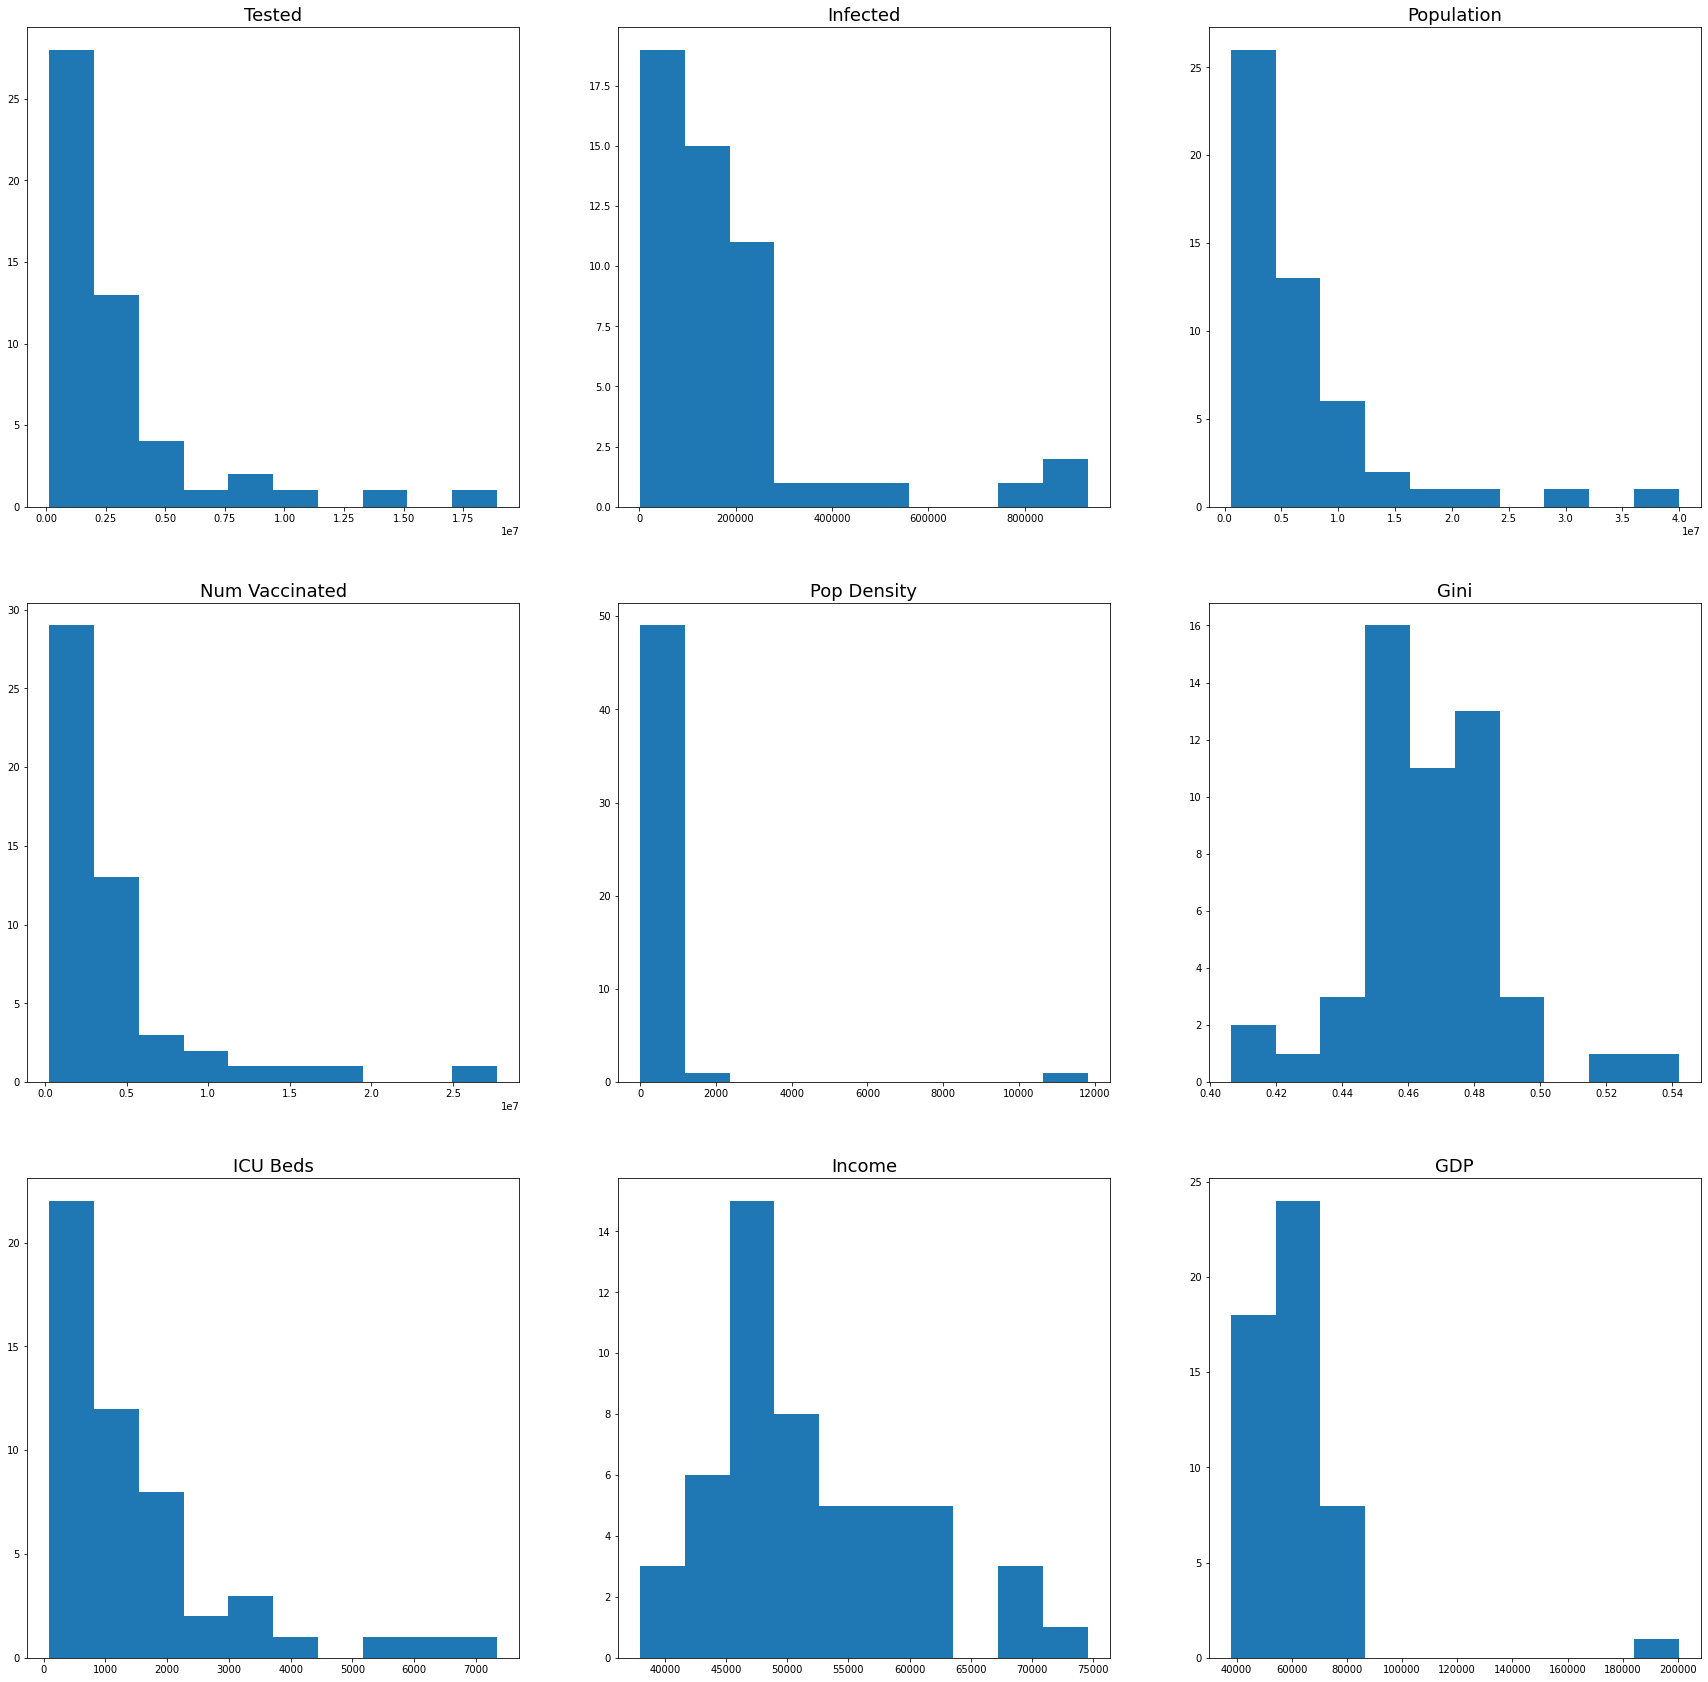

In [17]:
fig, axs = plt.subplots(3,3, figsize=(30,30))
c=1
for row in range(3):
    for col in range(3):
        axs[row][col].hist(df[df.columns[row+col+c]])
        axs[row][col].set_title(df.columns[row+col+c], size=18)
    c=c+2

Taking a look here, we'd expect relationship to look similar to that or inverse of Percent Infected, however most of these plots actually look pretty similar to Infected, Population, ICU beds, etc. Essentially they're all heavily frontloaded. We'll have to check and see if these are correlated to one another.

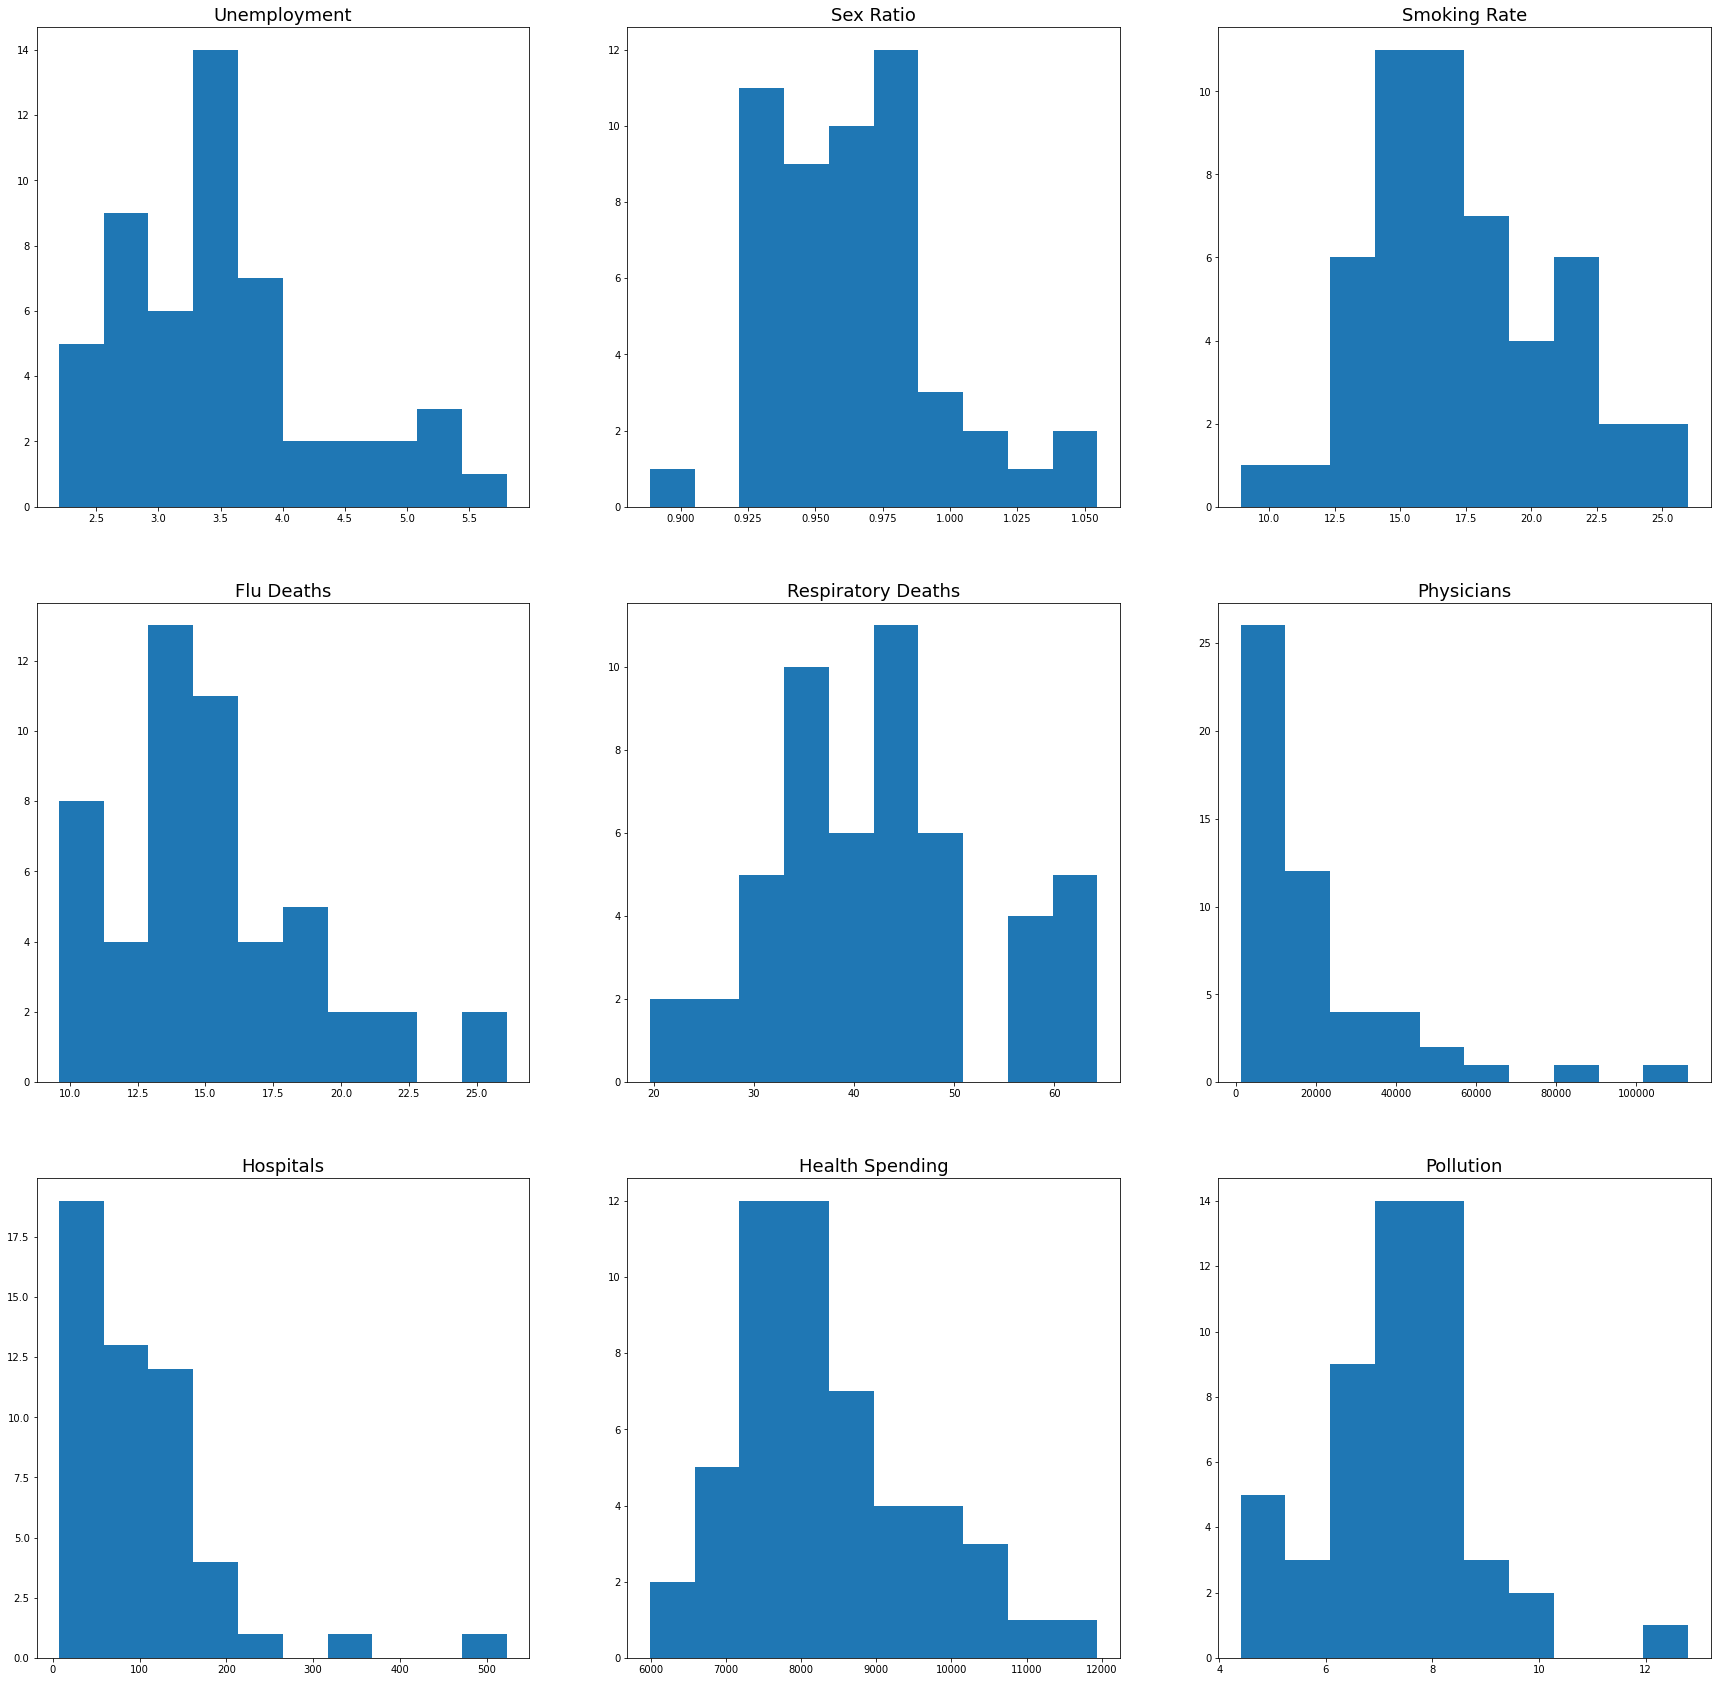

In [18]:
fig, axs = plt.subplots(3,3, figsize=(30,30))
c=10
for row in range(3):
    for col in range(3):
        axs[row][col].hist(df[df.columns[row+col+c]])
        axs[row][col].set_title(df.columns[row+col+c], size=18)
    c=c+2

A few more right-skewed histograms here, unemployment levels seem close but centrally shifted, smoking rate seems normalized, respiratory deaths seem heavily correlated, and pollution seems left-skewed. Let's take a look at our last grouping of variables.

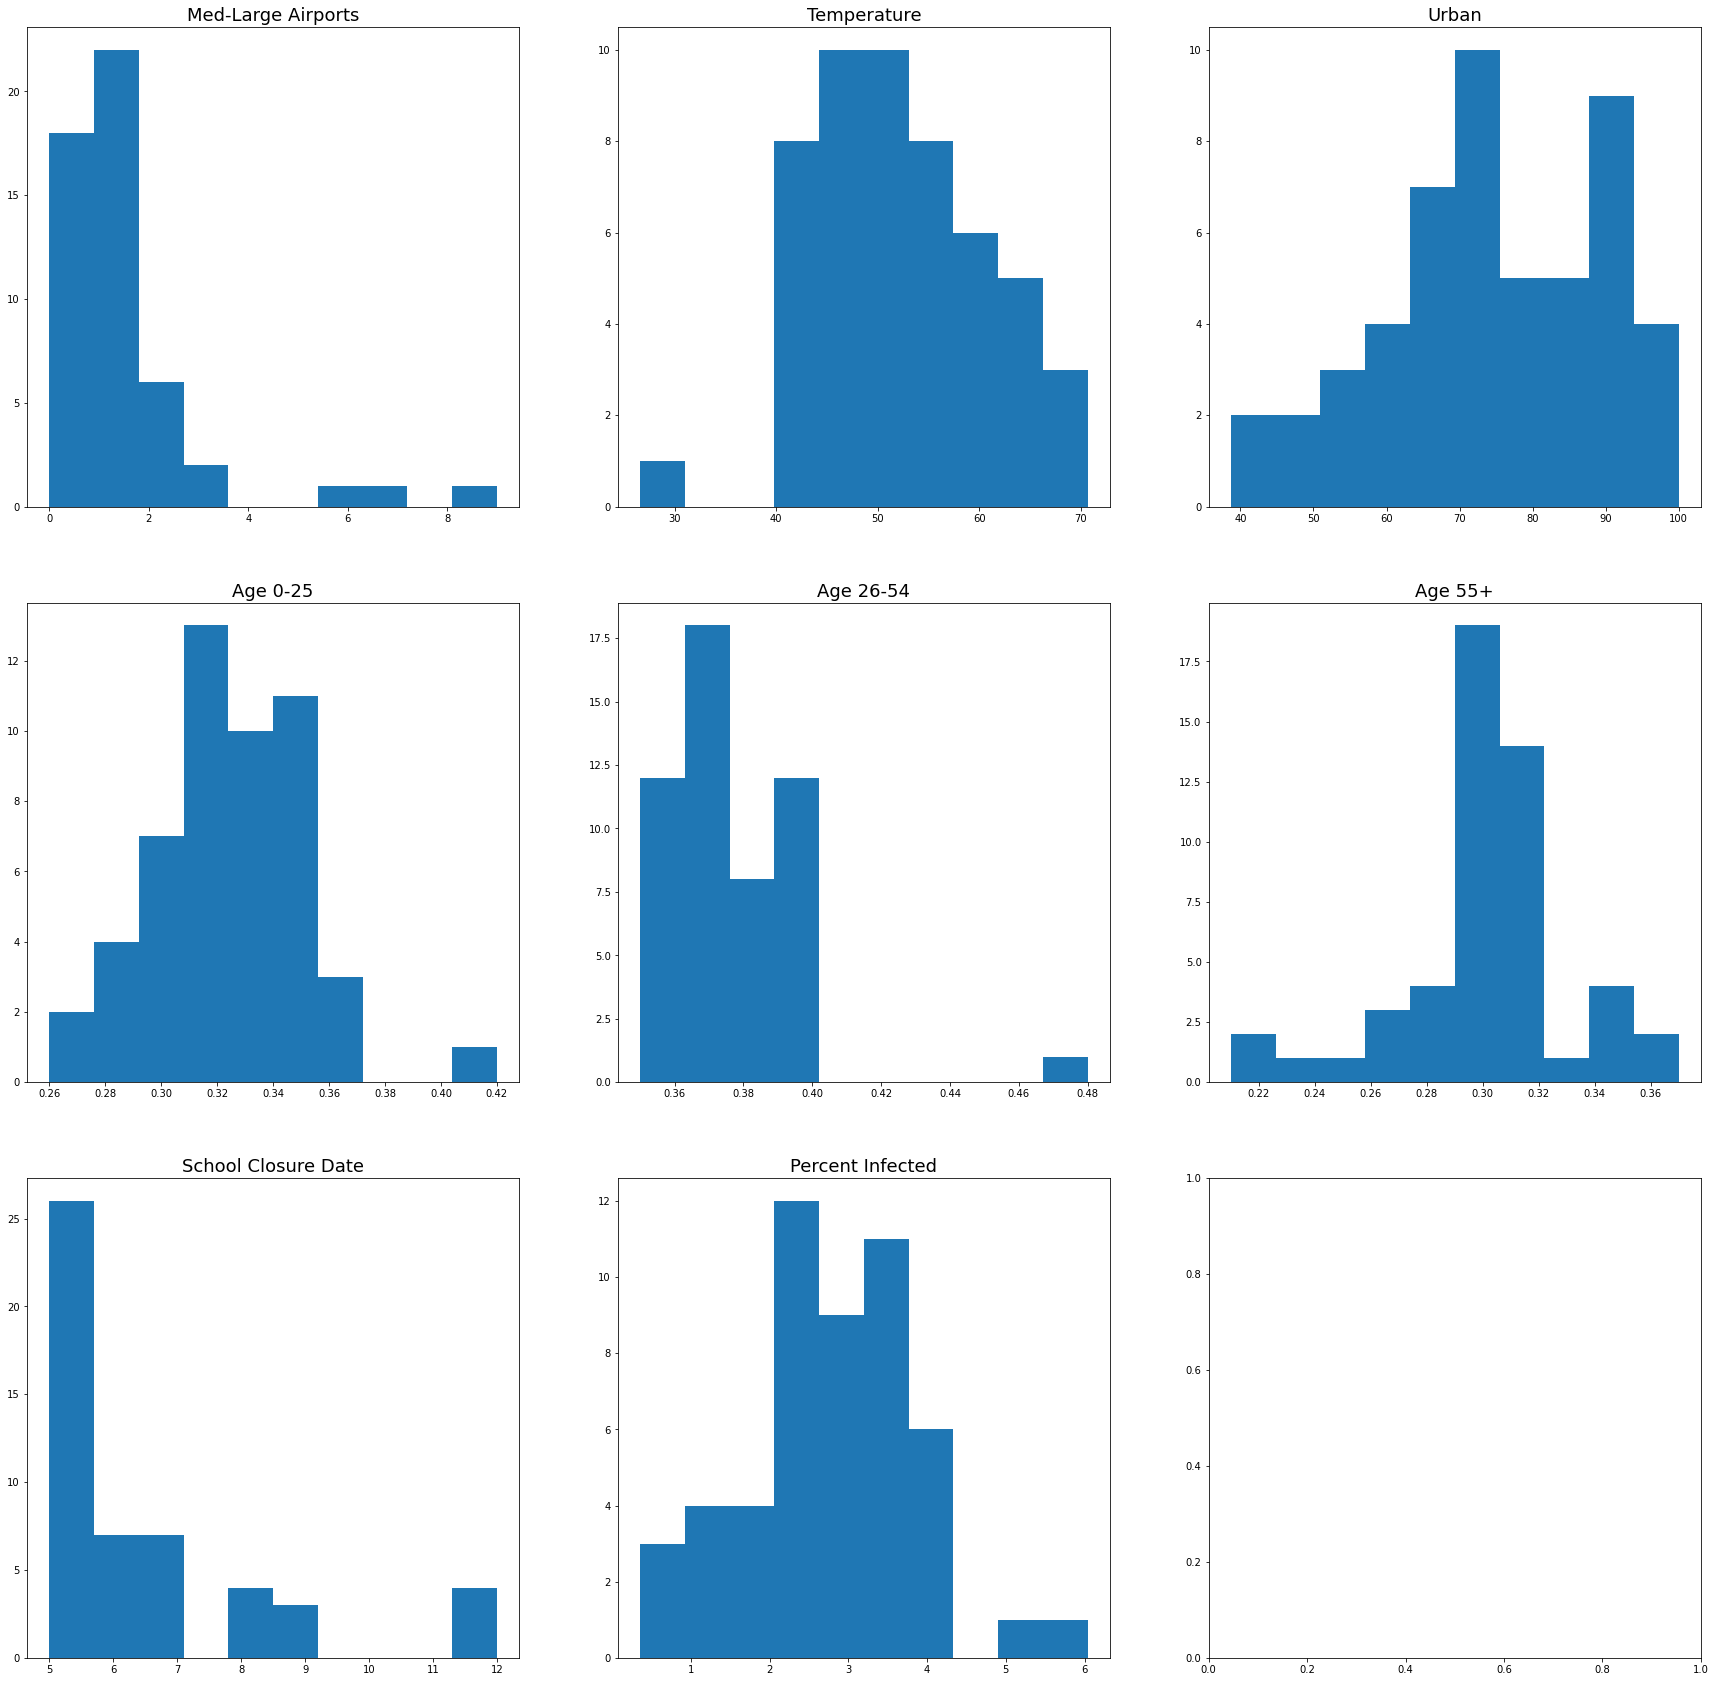

In [19]:
fig, axs = plt.subplots(3,3, figsize=(30,30))
c=19
for row in range(3):
    for col in range(3):
        if(not(row==2 and col==2)):
            axs[row][col].hist(df[df.columns[row+col+c]])
            axs[row][col].set_title(df.columns[row+col+c], size=18)
    c=c+2

Interestingly enough here, Age 0-25 variable looks remarkably similar to percent infected. Let's put some math to these correlations, first investigating whether any variables are more constant (less variable), which we wouldn't anticipate from our visual depictions.

In [20]:
print(df.shape)
var_thresh=feature_selection.VarianceThreshold()
variance=var_thresh.fit_transform(df.drop('State', axis=1))
print(variance.shape)

(51, 27)
(51, 26)


Without our state column in there, we're looking good, so no column has all the same values. Next let's find out if any variables are highly correlated to the dependent variable.

In [21]:
df.corr()['Percent Infected'].sort_values()

Age 55+               -0.358297
Income                -0.292474
Health Spending       -0.241999
Age 26-54             -0.190564
GDP                   -0.113897
Unemployment          -0.084418
Physicians            -0.082072
Pop Density           -0.066183
School Closure Date   -0.066106
Num Vaccinated        -0.053054
Med-Large Airports    -0.050987
Urban                 -0.024391
Population            -0.020490
Tested                -0.000316
ICU Beds               0.018565
Pollution              0.027887
Gini                   0.065630
Sex Ratio              0.116819
Hospitals              0.123307
Infected               0.154888
Temperature            0.173636
Smoking Rate           0.179333
Respiratory Deaths     0.197148
Flu Deaths             0.231301
Age 0-25               0.616476
Percent Infected       1.000000
Name: Percent Infected, dtype: float64

As we saw in our histograms, the weirdest piece seems to be that the percent of persons under 25 seems highly correlated to the Percent Infected, while Health Spending, Income amount, and number of persons age 55+ seems to actually inversely affect infection percent. Income and Health spending seems to make sense, but age 55+ seems a bit odd. The features that seem to have the least relation are Urban rating, population itself, number tested, ICU beds, and pollution. Only the Age 0-25 can really be considered a moderate relationship from these. And even more surprising is that the number of vaccinated individuals seems to have little effect here. Let's check one more item, namely Univariate feature selection, and see if we can't identify any features to be removed from there. Based on our work so far, we're eye-balling those 5 elements listed above to be on the chopping block.

In [22]:
k_best=SelectKBest(score_func=f_classif, k=20)
fit=k_best.fit(df.drop(['State', 'Percent Infected'], axis=1), df['Percent Infected'])
cols=fit.get_support(indices=True)
features_df_new=df.iloc[:, cols]
print(df.columns)
print(features_df_new.columns)

Index(['State', 'Tested', 'Infected', 'Population', 'Num Vaccinated',
       'Pop Density', 'Gini', 'ICU Beds', 'Income', 'GDP', 'Unemployment',
       'Sex Ratio', 'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths',
       'Physicians', 'Hospitals', 'Health Spending', 'Pollution',
       'Med-Large Airports', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54',
       'Age 55+', 'School Closure Date', 'Percent Infected'],
      dtype='object')
Index(['Pop Density', 'Gini', 'ICU Beds', 'Income', 'GDP', 'Unemployment',
       'Sex Ratio', 'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths',
       'Physicians', 'Hospitals', 'Health Spending', 'Pollution',
       'Med-Large Airports', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54',
       'Age 55+'],
      dtype='object')


C:\Users\Jake\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


Using that tool, we see the few the program decided to remove were: Tested, Infected, Population, Num Vaccinated, and School Closure Date. Most of those are in-line with our findings from earlier testing, specifically those elements of tested number and population, however, stripping out num vaccinated and school closured date while saving urban rating, pollution, and icu beds seems odd.

In conjunction with the various visual, statistical, and calculable results we found above, at this time we'll perform feature reduction to remove the common denominators: Tested Number, and Population.

In [23]:
df=df.drop(['Population', 'Tested'], axis=1)

In [24]:
df.columns

Index(['State', 'Infected', 'Num Vaccinated', 'Pop Density', 'Gini',
       'ICU Beds', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
       'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians',
       'Hospitals', 'Health Spending', 'Pollution', 'Med-Large Airports',
       'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+',
       'School Closure Date', 'Percent Infected'],
      dtype='object')

Looking good now, I believe we're geared up now for modeling.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Let's break our data into training and testing samples first, to prevent cross-contamination, then fit our linear regression model to each feature, predict our outputs for the test set, and evaluate the score of our models.

In [26]:
df2=pd.DataFrame(columns=['Feature', 'RSquared', 'Intercept', 'Slope', 'Mean Absolute Error'])
for feature in df.columns:
    if(feature!='State' and feature!='Percent Infected' and feature!='Infected'):
        x_test, x_train, y_test, y_train = train_test_split(df[feature], df['Percent Infected'], test_size=0.2)
        x_train=x_train.values.reshape(-1,1)
        y_train=y_train.values.reshape(-1,1)
        x_test=x_test.values.reshape(-1,1)
        y_test=y_test.values.reshape(-1,1)
        model = LinearRegression().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mae=mean_absolute_error(y_test, y_pred)
        df2=df2.append(pd.Series([feature, model.score(x_train, y_train), model.intercept_[0], model.coef_[0][0], mae], index=['Feature', 'RSquared', 'Intercept', 'Slope', 'Mean Absolute Error']), ignore_index=True)
print(df2)

                Feature  RSquared  Intercept         Slope  \
0        Num Vaccinated  0.073076   3.060749 -2.706833e-08   
1           Pop Density  0.017450   2.837954 -4.152925e-05   
2                  Gini  0.005515   3.474964 -1.988393e+00   
3              ICU Beds  0.020854   2.045685  8.182283e-05   
4                Income  0.377606   6.010042 -6.437415e-05   
5                   GDP  0.051881   3.502855 -1.679738e-05   
6          Unemployment  0.099658   0.749395  5.077573e-01   
7             Sex Ratio  0.005660   0.336147  2.408104e+00   
8          Smoking Rate  0.126176   0.296649  1.330110e-01   
9            Flu Deaths  0.165581   0.412649  1.355567e-01   
10   Respiratory Deaths  0.169063   2.225110  2.419346e-02   
11           Physicians  0.254719   3.560550 -3.382986e-05   
12            Hospitals  0.127361   2.318471  3.020954e-03   
13      Health Spending  0.280847   7.359883 -5.927205e-04   
14            Pollution  0.076581   1.073204  2.258963e-01   
15   Med

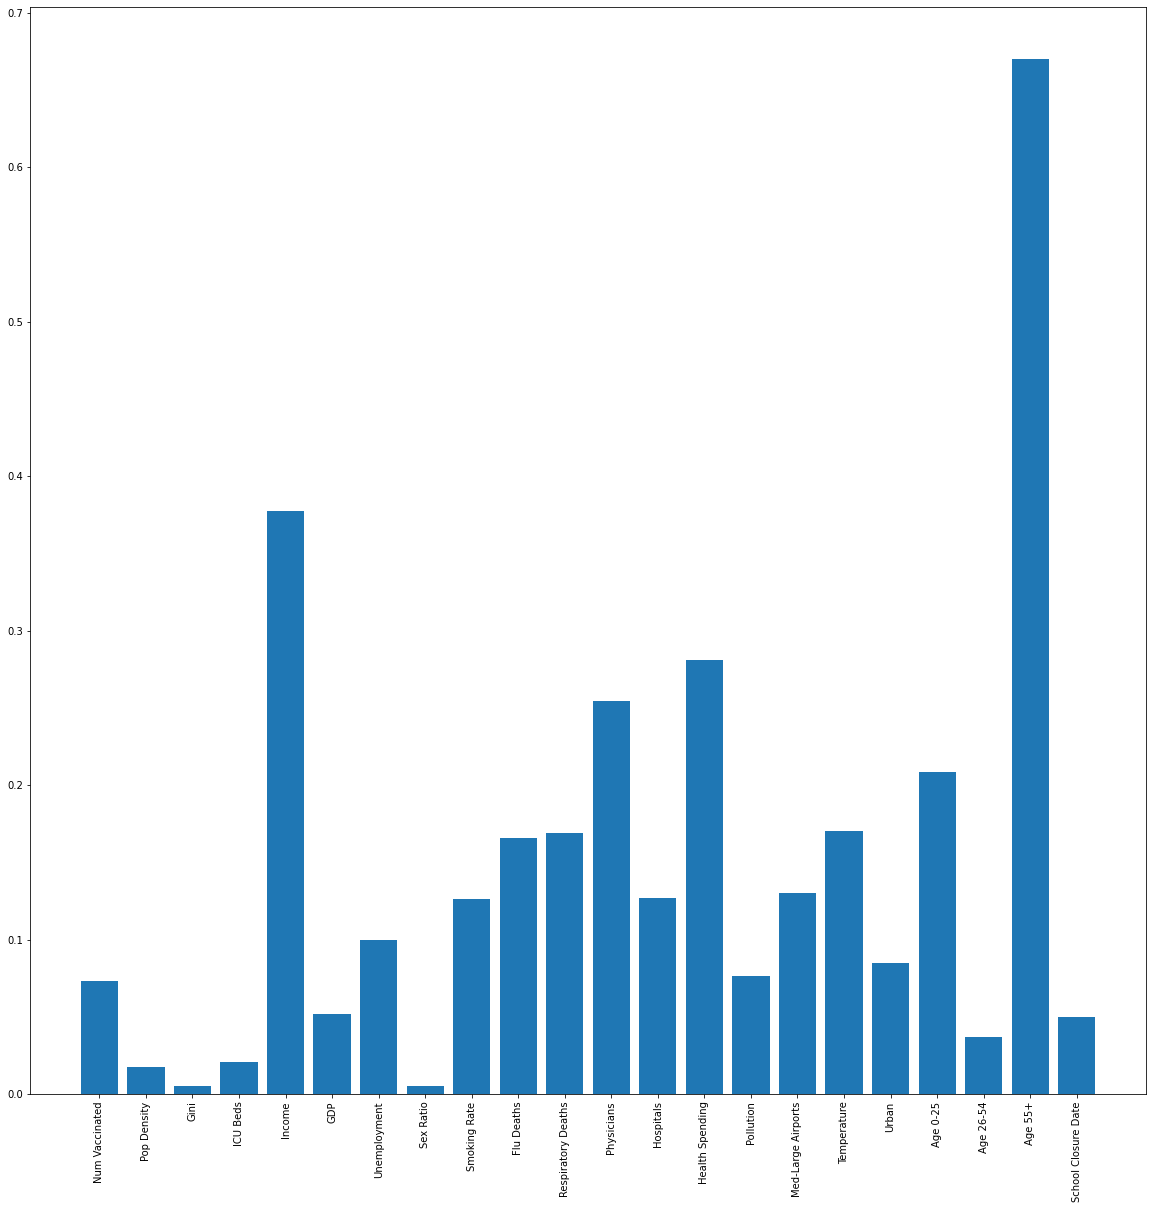

In [27]:
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(rotation=90)
ax.bar(df2['Feature'], df2['RSquared']);

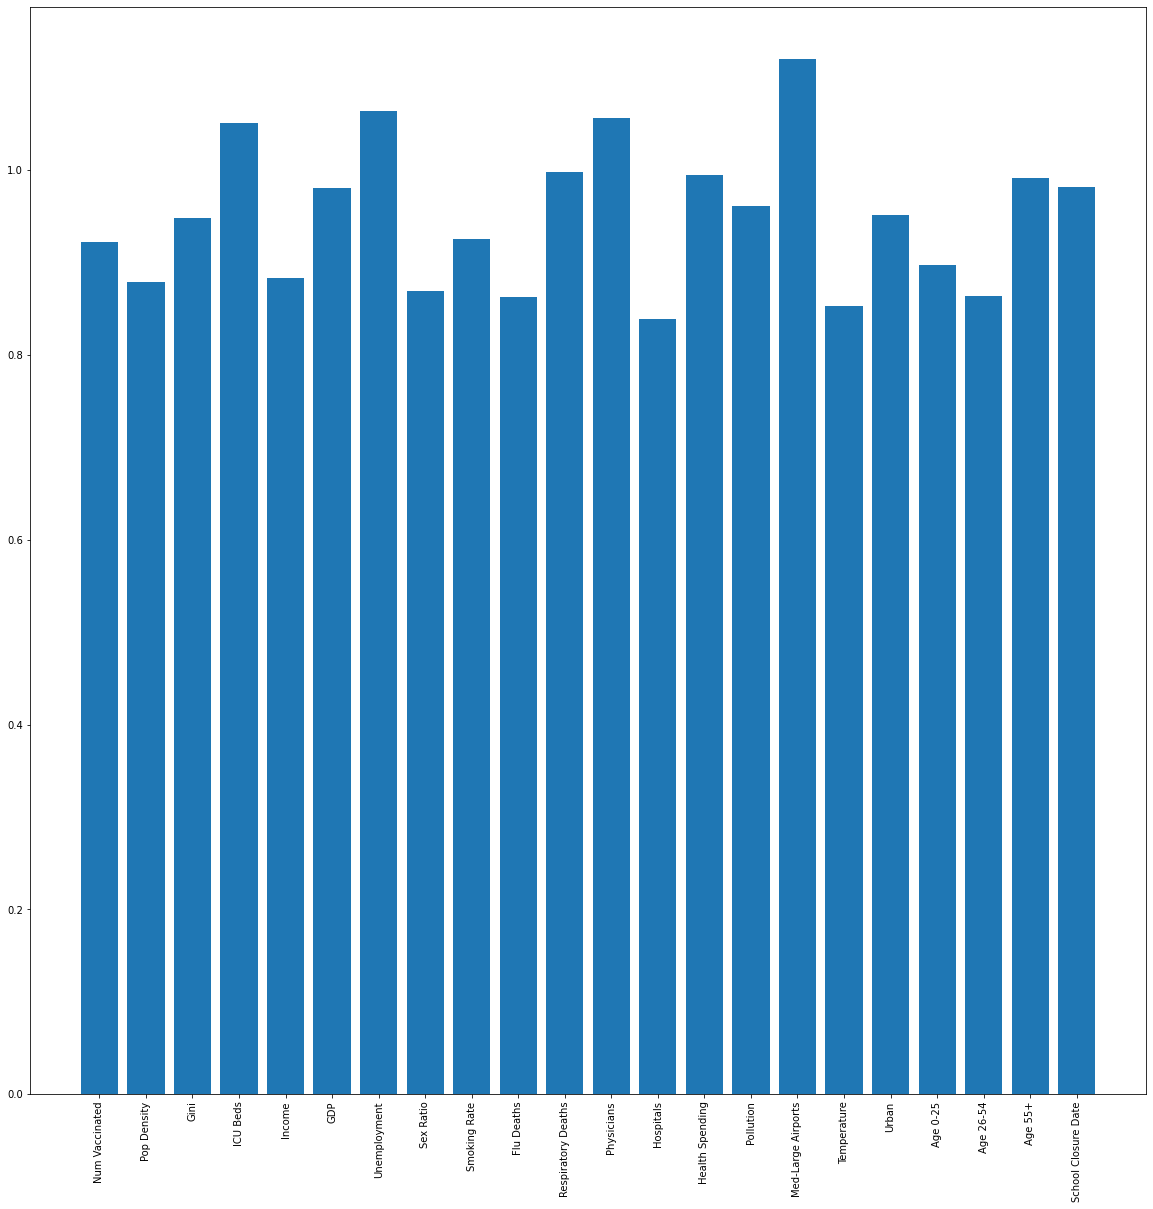

In [28]:
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(rotation=90)
ax.bar(df2['Feature'], df2['Mean Absolute Error']);

In [29]:
df2.sort_values(by=['RSquared']).tail(10)

,Feature,RSquared,Intercept,Slope,Mean Absolute Error
12,Hospitals,0.127361,2.318471,0.003021,0.838555
15,Med-Large Airports,0.130008,3.397559,-0.467193,1.120092
9,Flu Deaths,0.165581,0.412649,0.135557,0.862450
10,Respiratory Deaths,0.169063,2.225110,0.024193,0.997670
16,Temperature,0.170490,-0.093302,0.054893,0.852966
18,Age 0-25,0.208707,0.233547,8.612867,0.897051
11,Physicians,0.254719,3.560550,-0.000034,1.055690
13,Health Spending,0.280847,7.359883,-0.000593,0.994095
4,Income,0.377606,6.010042,-0.000064,0.883442
20,Age 55+,0.670104,8.652179,-20.807507,0.991578


In [30]:
df2.sort_values(by=['Mean Absolute Error']).head(10)

,Feature,RSquared,Intercept,Slope,Mean Absolute Error
12,Hospitals,0.127361,2.318471,3.020954e-03,0.838555
16,Temperature,0.170490,-0.093302,5.489337e-02,0.852966
9,Flu Deaths,0.165581,0.412649,1.355567e-01,0.862450
19,Age 26-54,0.037148,9.289009,-1.754479e+01,0.863593
7,Sex Ratio,0.005660,0.336147,2.408104e+00,0.869304
1,Pop Density,0.017450,2.837954,-4.152925e-05,0.878620
4,Income,0.377606,6.010042,-6.437415e-05,0.883442
18,Age 0-25,0.208707,0.233547,8.612867e+00,0.897051
0,Num Vaccinated,0.073076,3.060749,-2.706833e-08,0.922515
8,Smoking Rate,0.126176,0.296649,1.330110e-01,0.925681


Examining our results here, for highest accuracy elements, we'll want the highest R Squared, and lowest MAE values. From this, we would determine that number of hospitals, flu deaths, temperature, younger populations, and income are the crossovers in common. So analyses would say these would be most influential. We do see that smoking rate and num vaccinated are also pertinent in that mean absolute error, however number of vaccinated has a pretty low R squared value which is interesting to say the least.

Our next venue of analysis will be to run another regression model and compare our results found between the two elements. Let's give lasso regression a shot here.

In [52]:
from numpy import arange
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_absolute_error, r2_score

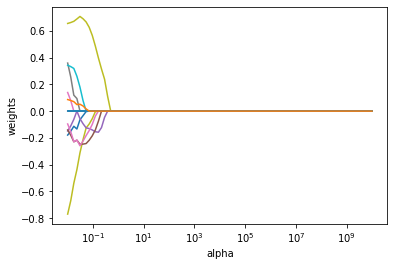

In [61]:
#separate to test and training sets
dfx=df[['Num Vaccinated', 'Pop Density', 'Gini',
       'ICU Beds', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
       'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians',
       'Hospitals', 'Health Spending', 'Pollution', 'Med-Large Airports',
       'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+',
       'School Closure Date']]
dfy=df['Percent Infected']

x_test, x_train, y_test, y_train = train_test_split(dfx, dfy, test_size=0.2)

alphas = 10**np.linspace(10,-2,100)*0.5

#plots coefficients for features as visual depcition of some reverting to zero (most)
lasso = Lasso(max_iter = 10000, normalize = True)
coefs=[]

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(x_train), y_train)
    coefs.append(lasso.coef_)

ax=plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [55]:
#identify the best alpha to lower error and identify error/R2
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
print(mean_absolute_error(y_test, lasso.predict(x_test)))
print(sklearn.metrics.r2_score(y_test, lasso.predict(x_test)))

0.8224473060215505
0.11751861168720712


In [58]:
pd.Series(lasso.coef_, index=dfx.columns)

Num Vaccinated          0.000000
Pop Density             0.000000
Gini                   13.021063
ICU Beds                0.000000
Income                 -0.000000
GDP                    -0.000000
Unemployment            0.000000
Sex Ratio              -0.000000
Smoking Rate            0.000000
Flu Deaths              0.000000
Respiratory Deaths      0.000000
Physicians              0.000000
Hospitals               0.000000
Health Spending        -0.000077
Pollution               0.000000
Med-Large Airports      0.000000
Temperature             0.013521
Urban                   0.000000
Age 0-25                8.355857
Age 26-54              -0.000000
Age 55+                -0.000000
School Closure Date     0.000000
dtype: float64

We're seeing the lowest mean absolute error witnessed here with the lasso method, although R Squared values are still rather low. Additionally, we're seeing that when the Lasso algorithm decided on the most important values, it found some interesting insights of its own, namely that the most pertinent factors were Gini(economic disparity), health spending, temperature, and youth population.

For one last comparison, let's compare this versus the ridge model.

In [59]:
from sklearn.linear_model import Ridge, RidgeCV

In [69]:
#identify the alpha to optimize lowest MAE
ridgecv = RidgeCV(alphas=alphas, scoring = 'neg_mean_absolute_error', normalize=True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.5748784976988678

In [70]:
#use this alpha just derive to identify lowest MAE
ridge=Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(x_train, y_train)
print(mean_absolute_error(y_test, ridge.predict(x_test)))
print(sklearn.metrics.r2_score(y_test, ridge.predict(x_test)))

1.153449292722248
-0.6273389649514891


In [71]:
#use this model to identify which features are most pertinent
ridge.fit(dfx, dfy)
pd.Series(ridge.coef_, index=dfx.columns)

Num Vaccinated        -4.411658e-09
Pop Density            8.425502e-06
Gini                   7.342516e+00
ICU Beds               1.662262e-05
Income                -9.778047e-06
GDP                    5.299924e-08
Unemployment          -1.415165e-01
Sex Ratio              2.927704e+00
Smoking Rate           2.078238e-02
Flu Deaths             2.695985e-02
Respiratory Deaths    -4.069489e-04
Physicians            -1.955883e-06
Hospitals              4.879276e-04
Health Spending        2.255721e-05
Pollution             -3.310515e-02
Med-Large Airports    -1.771243e-02
Temperature            7.680682e-03
Urban                  3.468296e-03
Age 0-25               1.292158e+01
Age 26-54             -7.002878e+00
Age 55+               -5.198805e+00
School Closure Date   -6.279785e-02
dtype: float64

Hate to see the negative R Squared value and highest mean absolute error values there. Ridge doesn't seem to work too well here. 